In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bh_molecule.instruments.vis133m import Vis133M
from bh_molecule.dataio import load_v00_wavelengths
from bh_molecule.physics import BHModel

In [2]:
from bh_molecule.fit import BHFitter

In [3]:
FITS = './133mVis_169626.fits'
wavecal_csv = './133mVis_wavcal.csv'
s26 = Vis133M(FITS,wavecal_csv)
s26.set_scale(0.0001837)
s26.set_dark(frame=49, channel=43)
s26.set_baseline_zero(True)
s26.set_time_linspace(0, 10)
#s26.plot_band_map((432.5,433.85))

In [4]:
model = BHModel()

,Parameter,Value
0,C,0.262 ± 0.002
1,T_rot,3600 ± 100 K
2,dx,(101 ± 7)e-5 nm
3,w_inst,0.0245 ± 0.0002 nm
4,base,(43 ± 2)e-4
5,I_R7,(25 ± 3)e-5
6,I_R8,(30 ± 3)e-5


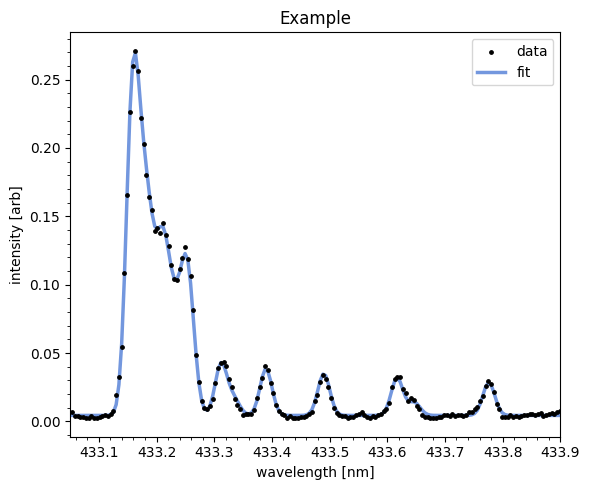

In [5]:
fitr = BHFitter(s26, model, warm_start=True, weight="none")
res = fitr.fit(frame=38, channel=31)
display(res["summary"])
_ = fitr.plot_single(res, title="Example")

In [6]:
list(range(24,31))

[24, 25, 26, 27, 28, 29, 30]

In [7]:
resb,curves = fitr.batch((25,26,31), range(28,31),return_curves=True)

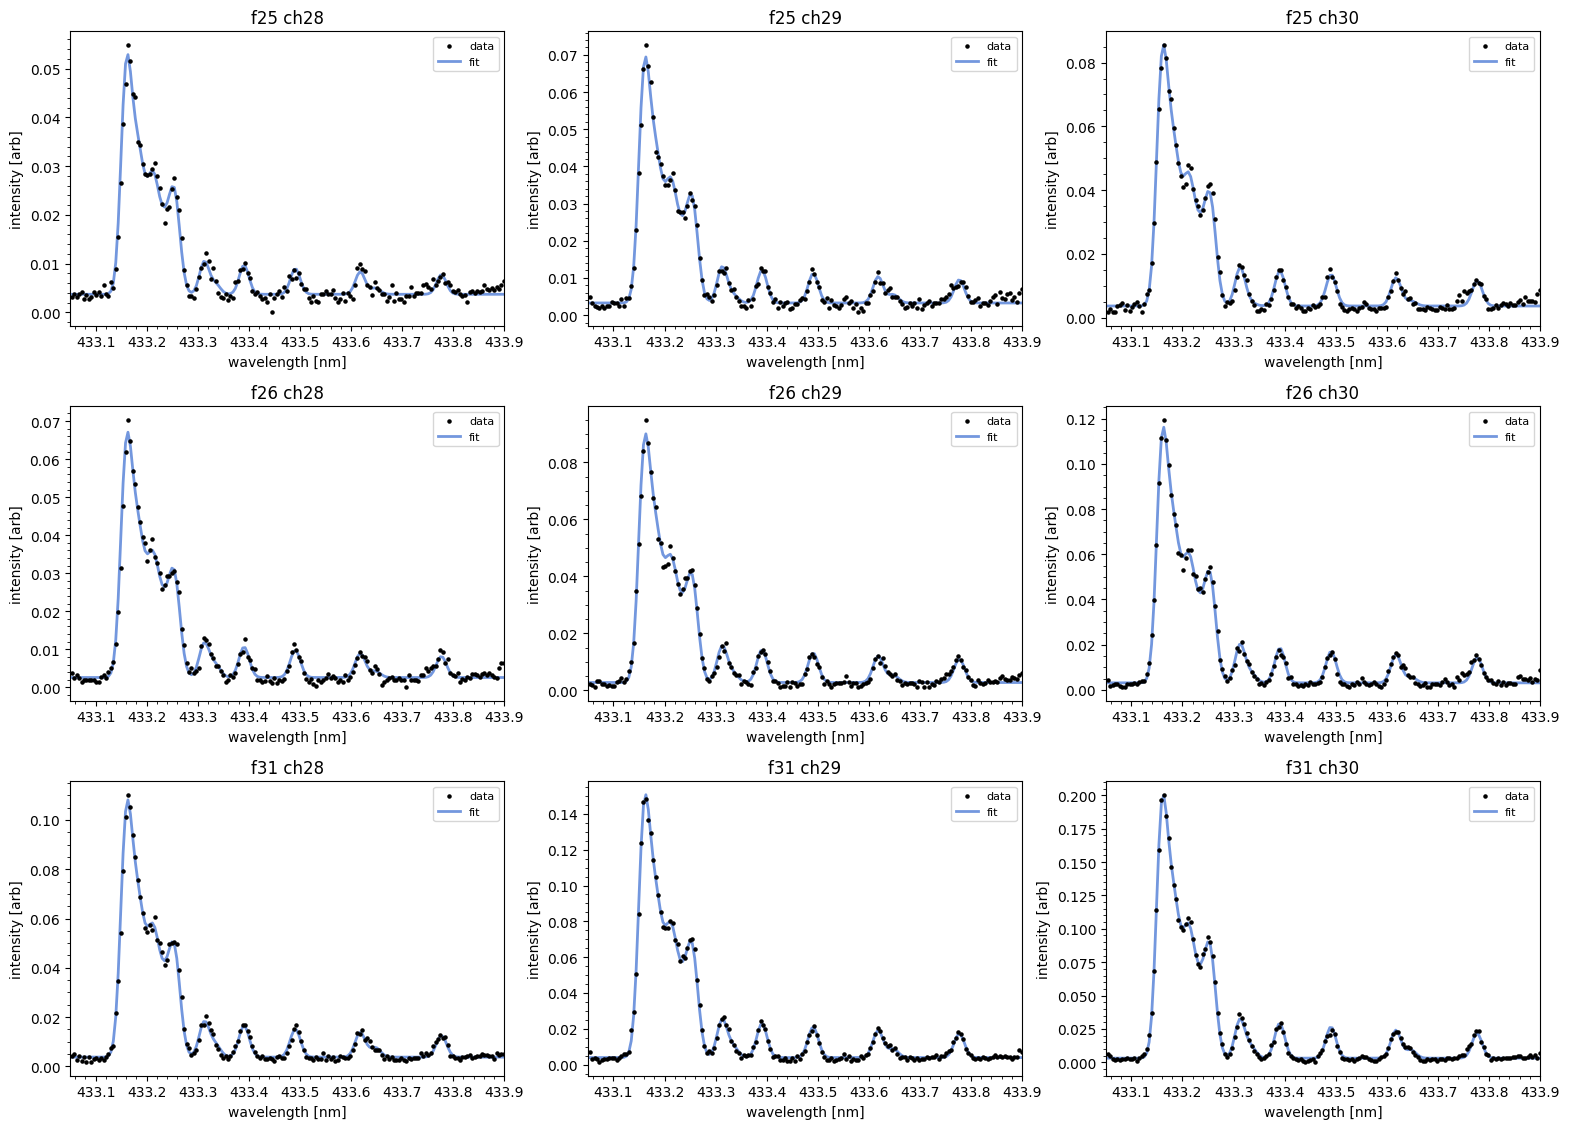

In [8]:
_ = fitr.plot_grid(curves)

(<Figure size 700x400 with 1 Axes>,
 <Axes: xlabel='wavelength [nm]', ylabel='intensity [arb]'>)

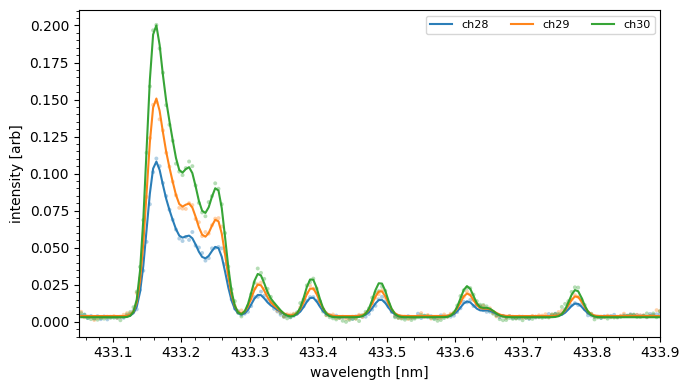

In [9]:
fitr.plot_overlay(curves,frame=31,channels=range(28,31),line_width=1.5)